Copy
# Análisis de Componentes Principales (PCA)

## ¿Qué son los Componentes Principales?

Los Componentes Principales son nuevas variables construidas como combinaciones lineales de las variables originales en un conjunto de datos. Estas nuevas variables:

1. **Son ortogonales**: No están correlacionadas entre sí
2. **Capturan la máxima varianza**: El primer componente captura la mayor variabilidad posible, el segundo la siguiente mayor (sin correlacionarse con el primero), y así sucesivamente
3. **Reducen dimensionalidad**: Permiten representar los datos en menos dimensiones con mínima pérdida de información

## ¿Qué hace PCA?

1. **Transformación de datos**:
   - Convierte variables correlacionadas en un conjunto de variables no correlacionadas
   - Gira el sistema de coordenadas original para alinearlo con las direcciones de máxima varianza

2. **Reducción de dimensionalidad**:
   - Selecciona solo los componentes que capturan la mayor parte de la varianza
   - Descarta componentes con poca varianza (que suelen corresponder a ruido)

3. **Visualización**:
   - Permite visualizar datos multidimensionales en 2D o 3D
   - Mantiene las relaciones más importantes entre puntos de datos

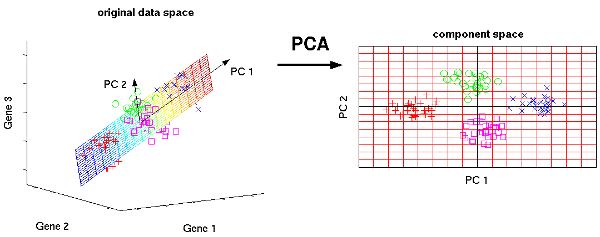

El ACP resumido:

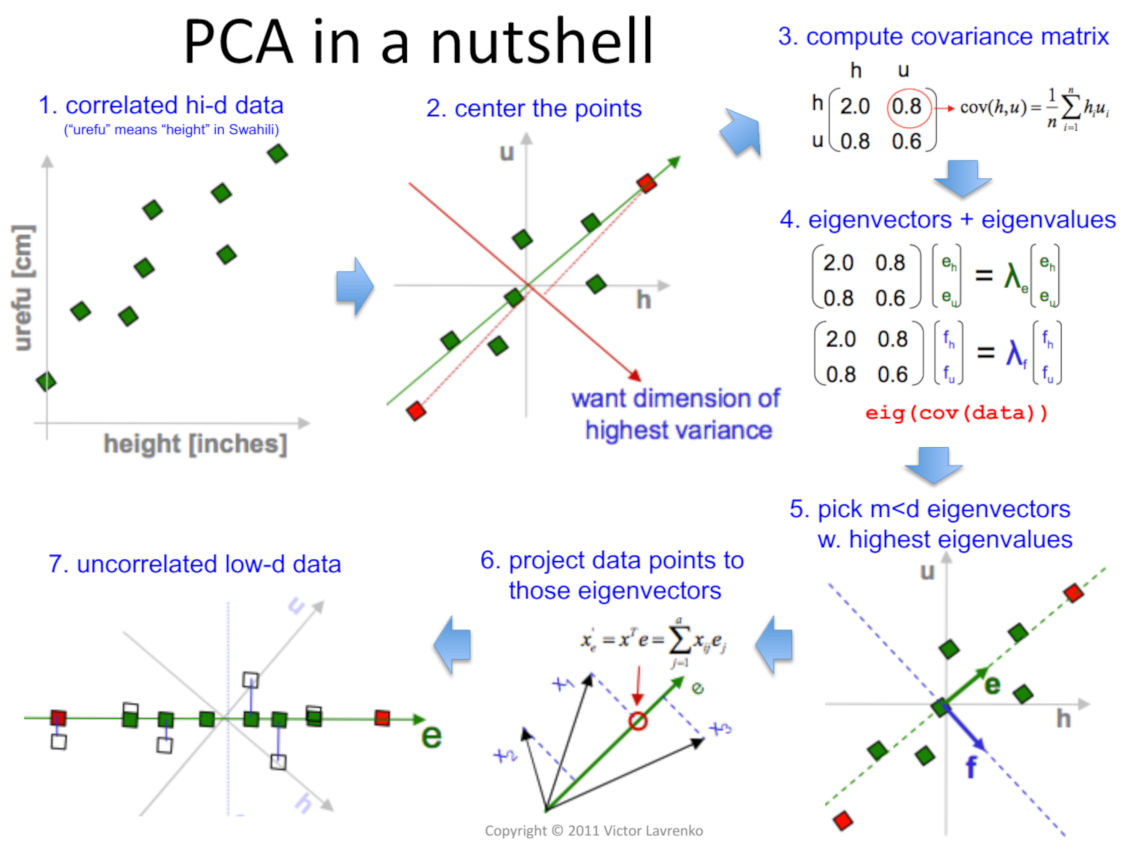

A continuación cargaremos los módulos de Python para llevar a cabo el análisis de componentes principales:

In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import seaborn as sns  # Añadir esta importación


# Lectura de datos

In [90]:
# Cargamos el conjunto de datos Iris
data = load_iris()
X = data.data
y = data.target
feature_names = data.feature_names
target_names = data.target_names

# Creamos un DataFrame para mejor visualización
df = pd.DataFrame(X, columns=feature_names)
df['Species'] = [target_names[i] for i in y]

print("Primeras filas del dataset:")
df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'Species']

X = df.drop(columns=['Species'])
y = df[['Species']]
# Cargamos el conjunto de datos Iris
data = load_iris()
X = data.data
y = data.target
feature_names = data.feature_names
target_names = data.target_names

# Creamos un DataFrame para mejor visualización
df = pd.DataFrame(X, columns=feature_names)
df['Species'] = [target_names[i] for i in y]


df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'Species']
print(df.head())

X = df.drop(columns=['Species'])
y = df[['Species']]


Primeras filas del dataset:
   sepal_length  sepal_width  petal_length  petal_width Species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


# División en train  test
Dividimos los datos en train y test para sobre la base de entrenamiento realizar el procedimiento de componentes principales, este procedimiento se herederá a la base de datos de prueba:

In [92]:
X = df.drop(columns=['Species'])
y = df[['Species']]

# Dividimos en train (70%) y test (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [94]:
X_train

,sepal_length,sepal_width,petal_length,petal_width
98,5.1,2.5,3.0,1.1
68,6.2,2.2,4.5,1.5
19,5.1,3.8,1.5,0.3
143,6.8,3.2,5.9,2.3
99,5.7,2.8,4.1,1.3
...,...,...,...,...
37,4.9,3.6,1.4,0.1
79,5.7,2.6,3.5,1.0
33,5.5,4.2,1.4,0.2
94,5.6,2.7,4.2,1.3


Conservamos unos dataframes para visualización:

In [93]:
# DataFrames para visualización
df_train = pd.DataFrame(X_train) # , columns=feature_names
df_train['Species'] = y_train #[target_names[i] for i in y_train]

df_test = pd.DataFrame(X_test) # , columns=feature_names
df_test['Species'] = y_test #[target_names[i] for i in y_test]


print("Tamaño del conjunto de entrenamiento:", X_train.shape)
print("Tamaño del conjunto de prueba:", X_test.shape)

Tamaño del conjunto de entrenamiento: (105, 4)
Tamaño del conjunto de prueba: (45, 4)


# Procedimiento de estandarización

In [95]:
# Estandarizamos los datos (usando parámetros de train para ambos conjuntos)
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)  # Ajuste solo con train
X_test_std = scaler.transform(X_test)        # Transformación con parámetros de train
print("\nMedia de train después de estandarización:", np.mean(X_train_std, axis=0))
print("Desviación estándar de train:", np.std(X_train_std, axis=0))
print("\nMedia de test después de estandarización:", np.mean(X_test_std, axis=0))
print("Desviación estándar de test:", np.std(X_test_std, axis=0))




Media de train después de estandarización: [ 2.38327876e-15 -1.12145742e-15 -1.37456184e-16 -6.97854473e-17]
Desviación estándar de train: [1. 1. 1. 1.]

Media de test después de estandarización: [-0.11643861  0.01534903 -0.05024191 -0.02748619]
Desviación estándar de test: [0.85754489 0.83947065 0.96847064 0.9374037 ]


In [96]:
X_train_std

array([[-0.90045861, -1.22024754, -0.4419858 , -0.13661044],
       [ 0.38036614, -1.87955796,  0.40282929,  0.38029394],
       [-0.90045861,  1.63676428, -1.2868009 , -1.17041921],
       [ 1.07899781,  0.31814344,  1.19132338,  1.41410271],
       [-0.20182693, -0.56093712,  0.17754527,  0.12184175],
       [ 0.9625592 , -0.12139684,  0.79707634,  1.41410271],
       [-1.13333583,  0.0983733 , -1.2868009 , -1.4288714 ],
       [-0.90045861,  1.63676428, -1.23047989, -1.29964531],
       [-1.7155289 , -0.34116698, -1.3431219 , -1.29964531],
       [ 1.42831365, -0.12139684,  1.19132338,  1.15565051],
       [ 0.72968197,  0.31814344,  0.74075533,  1.02642442],
       [-1.13333583, -0.12139684, -1.3431219 , -1.29964531],
       [-1.01689722, -0.12139684, -1.23047989, -1.29964531],
       [ 0.14748891, -0.34116698,  0.40282929,  0.38029394],
       [-0.43470415, -1.44001768,  0.00858225, -0.13661044],
       [ 1.54475226,  0.31814344,  1.24764439,  0.76797223],
       [-1.01689722,  0.

# Aplicación de PCA

In [14]:
pca = PCA()
X_train_pca = pca.fit_transform(X_train_std)  # Ajuste y transformación
X_test_pca = pca.transform(X_test_std)        # Solo transformación con modelo ajustado

A continuación se presentan las columnas con los resultados:

In [15]:
pca_columns = [f'PC{i+1}' for i in range(X_train_pca.shape[1])]
pca_columns

['PC1', 'PC2', 'PC3', 'PC4']

In [16]:
df_train_pca = pd.DataFrame(X_train_pca, columns=pca_columns)
df_train_pca['Species'] = df_train['Species']

df_test_pca = pd.DataFrame(X_test_pca, columns=pca_columns)
df_test_pca['Species'] = df_test['Species']

df_train_pca

,PC1,PC2,PC3,PC4,Species
0,-0.518985,-1.468901,-0.242940,-0.166763,setosa
1,1.104272,-1.605068,0.391188,-0.188742,setosa
2,-2.284563,1.134409,-0.097101,0.004207,NaN
3,1.991473,0.773430,-0.344630,-0.038234,setosa
4,0.200363,-0.583642,-0.124232,0.074395,setosa
...,...,...,...,...,...
100,-2.481698,0.626801,0.003055,0.108309,virginica
101,-0.110474,-1.026928,0.262845,-0.046985,virginica
102,-2.355039,2.108567,0.138442,-0.008062,virginica
103,0.224263,-0.827982,-0.167677,0.127955,virginica


In [17]:

print("\nVarianzas explicadas (train):", pca.explained_variance_ratio_)


Varianzas explicadas (train): [0.7264421  0.23378786 0.03518741 0.00458263]


# ¿Cómo se obtienen los pesos?

In [18]:
components_df = pd.DataFrame(pca.components_.T, 
                           columns=pca_columns,
                           index=feature_names)
print("\nMatriz de componentes (pesos):")
print(components_df)



Matriz de componentes (pesos):
                        PC1       PC2       PC3       PC4
sepal length (cm)  0.530568  0.337784  0.724413 -0.282181
sepal width (cm)  -0.240617  0.939166 -0.218239  0.111546
petal length (cm)  0.582340  0.024723 -0.125306  0.802850
petal width (cm)   0.566993  0.057082 -0.641791 -0.513190


Coloquemos los pesos más bonitos:

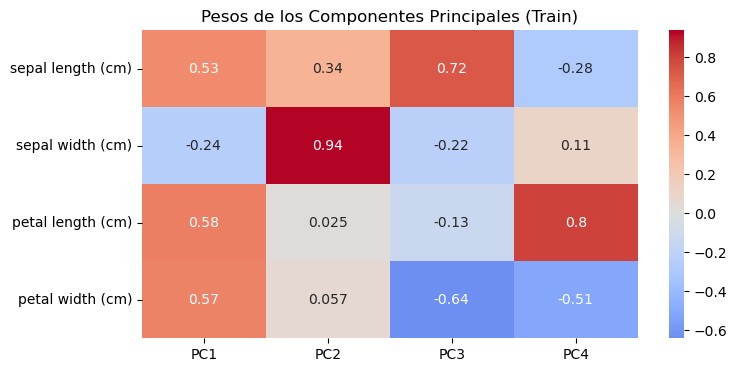

In [32]:
# Heatmap de los pesos
plt.figure(figsize=(8, 4))
sns.heatmap(components_df, annot=True, cmap='coolwarm', center=0)
plt.title('Pesos de los Componentes Principales (Train)')
plt.show()

Explicar paso a paso como se obtienen los pesos: Primer valor estandarizado:

In [25]:
X_train_std[0,:]

array([-0.90045861, -1.22024754, -0.4419858 , -0.13661044])

In [27]:
0.530568 * -0.90045861 + -0.240617 * -1.22024754 + 0.582340  * -0.4419858 + 0.566993  *  -0.13661044  

-0.51898539543722

In [28]:
df_train_pca

,PC1,PC2,PC3,PC4,Species
0,-0.518985,-1.468901,-0.242940,-0.166763,setosa
1,1.104272,-1.605068,0.391188,-0.188742,setosa
2,-2.284563,1.134409,-0.097101,0.004207,NaN
3,1.991473,0.773430,-0.344630,-0.038234,setosa
4,0.200363,-0.583642,-0.124232,0.074395,setosa
...,...,...,...,...,...
100,-2.481698,0.626801,0.003055,0.108309,virginica
101,-0.110474,-1.026928,0.262845,-0.046985,virginica
102,-2.355039,2.108567,0.138442,-0.008062,virginica
103,0.224263,-0.827982,-0.167677,0.127955,virginica


# Fórmulas de Contribuciones en PCA

## 1. Contribución de Variables a los Componentes Principales

La contribución de cada variable original $X_j$ al componente principal $PC_i$ se calcula como:

$$
CTR_{j,i} = \frac{(a_{j,i})^2}{\sum_{k=1}^p (a_{k,i})^2} \times 100\%
$$

Donde:
- $a_{j,i}$ es el peso (loading) de la variable $j$ en el componente $i$
- $p$ es el número total de variables originales
- El resultado se expresa como porcentaje

## 2. Contribución de Componentes a la Varianza Total

La contribución de cada componente principal a la varianza total:

$$
CTR_{PC_i} = \frac{\lambda_i}{\sum_{k=1}^p \lambda_k} \times 100\%
$$

Donde:
- $\lambda_i$ es el valor propio (eigenvalue) del componente $i$
- $p$ es el número total de componentes

## 3. Contribución de Observaciones a los Componentes

Para una observación $x_k$, su contribución al componente $i$ es:

$$
CTR_{k,i} = \frac{z_{k,i}^2}{n \cdot \lambda_i} \times 100\%
$$

Donde:
- $z_{k,i}$ es el score de la observación $k$ en el componente $i$
- $n$ es el número total de observaciones
- $\lambda_i$ es el valor propio del componente $i$


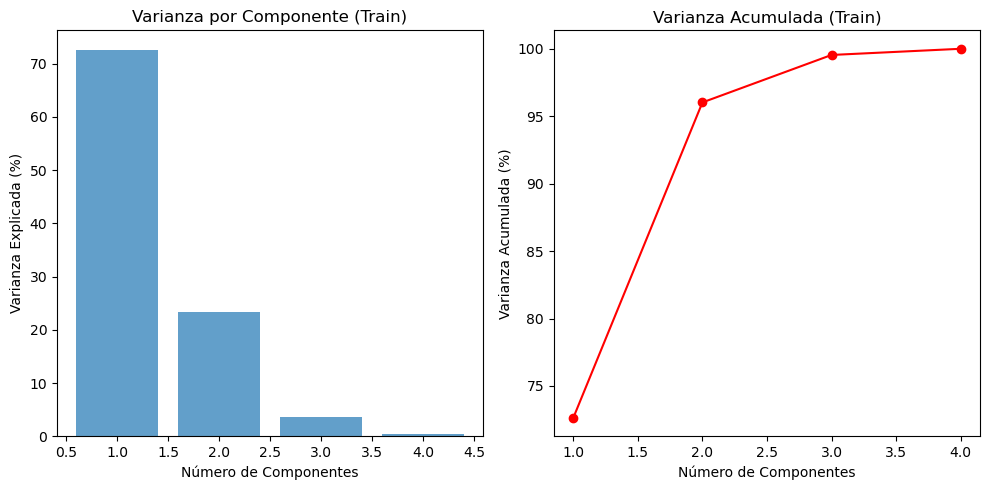

In [35]:

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), 
        pca.explained_variance_ratio_ * 100, alpha=0.7)
plt.xlabel('Número de Componentes')
plt.ylabel('Varianza Explicada (%)')
plt.title('Varianza por Componente (Train)')

plt.subplot(1, 2, 2)
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), 
         np.cumsum(pca.explained_variance_ratio_) * 100, 'ro-')
plt.xlabel('Número de Componentes')
plt.ylabel('Varianza Acumulada (%)')
plt.title('Varianza Acumulada (Train)')
plt.tight_layout()
plt.show()


# Contribuciones de variables
Un dato importante es entender las contibuciones de las variables a cada componente esto puede ayudar a seleccionar las variables más relevantes de análisis:


Contribuciones de variables a los componentes (% - train):
                         PC1        PC2        PC3        PC4
sepal length (cm)  28.150210  11.409784  52.477403   7.962603
sepal width (cm)    5.789663  88.203260   4.762817   1.244259
petal length (cm)  33.911964   0.061125   1.570153  64.456758
petal width (cm)   32.148163   0.325830  41.189627  26.336381


<Figure size 1000x500 with 0 Axes>

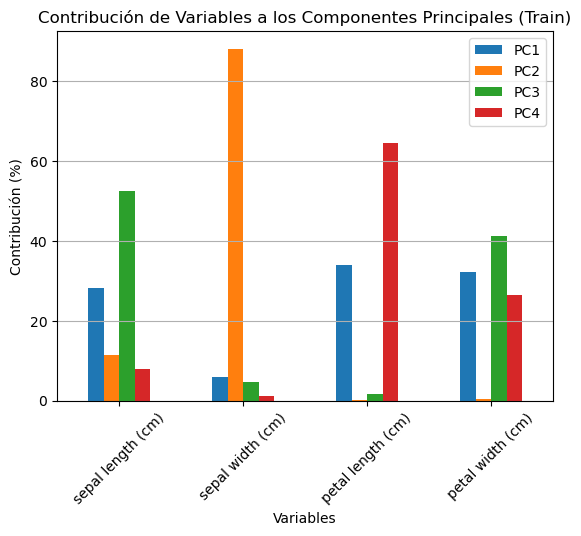

In [34]:


# Contribuciones de variables a los componentes (sólo train)
contributions = pca.components_**2
contributions = contributions.T  # Transponer para tener variables x componentes
contributions = contributions / np.sum(contributions, axis=0) * 100

contributions_df = pd.DataFrame(contributions, 
                              columns=pca_columns,
                              index=feature_names)

print("\nContribuciones de variables a los componentes (% - train):")
print(contributions_df)

# Gráfico de contribuciones
plt.figure(figsize=(10, 5))
contributions_df.iloc[:, :4].plot(kind='bar')  # Mostrar solo primeros 4 componentes
plt.xlabel('Variables')
plt.ylabel('Contribución (%)')
plt.title('Contribución de Variables a los Componentes Principales (Train)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


# Crear un pipeline con componentes principales

Fitting 5 folds for each of 63 candidates, totalling 315 fits

Mejores parámetros: {'classifier': SVC(random_state=42), 'classifier__C': 0.1, 'classifier__kernel': 'linear', 'pca__n_components': 3}
Mejor accuracy (validación cruzada): 0.975

Reporte de clasificación en test:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      0.90      0.90        10
   virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30

Accuracy en test: 0.933


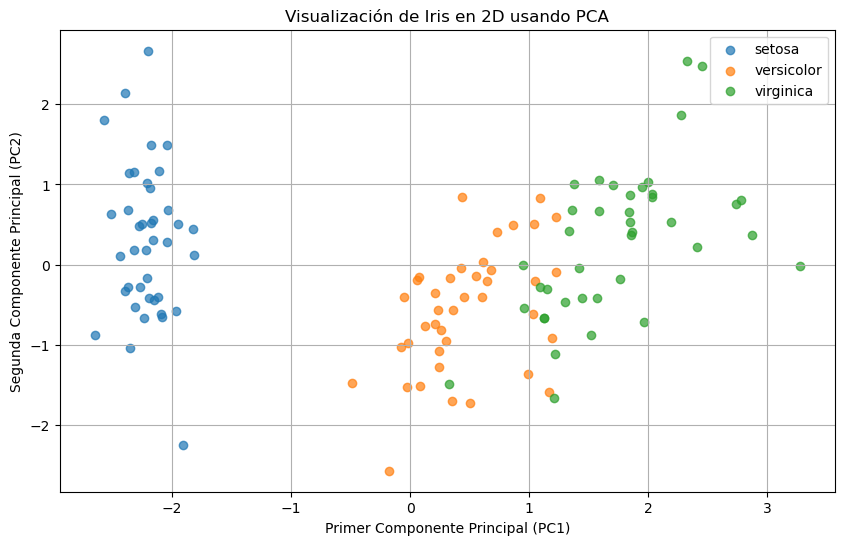

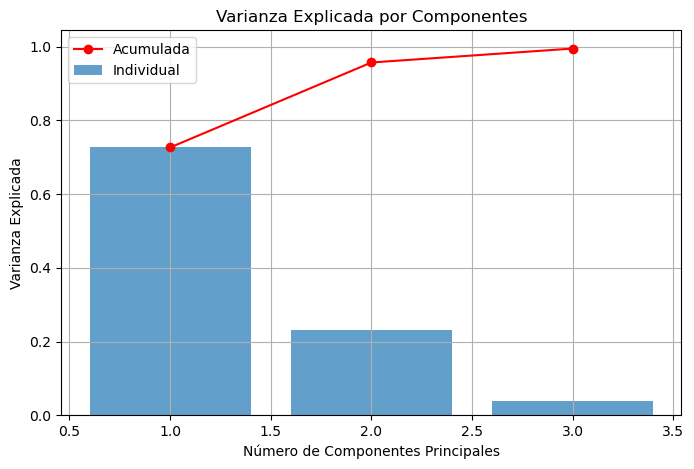


Varianza explicada por componente: [0.72677234 0.23066667 0.03781901]
Varianza acumulada: [0.72677234 0.95743901 0.99525803]


=== Rendimiento en Test ===
Accuracy: 0.9

Reporte de Clasificación:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.82      0.90      0.86        10
   virginica       0.89      0.80      0.84        10

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30



C:\Users\joszea\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


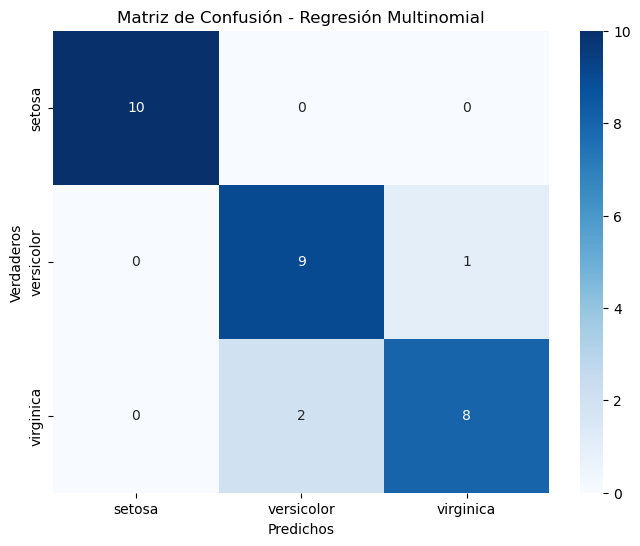

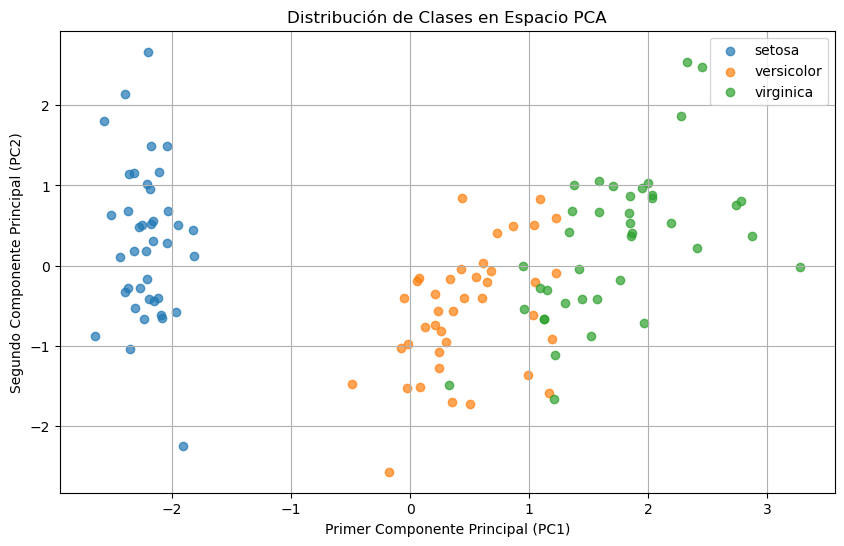

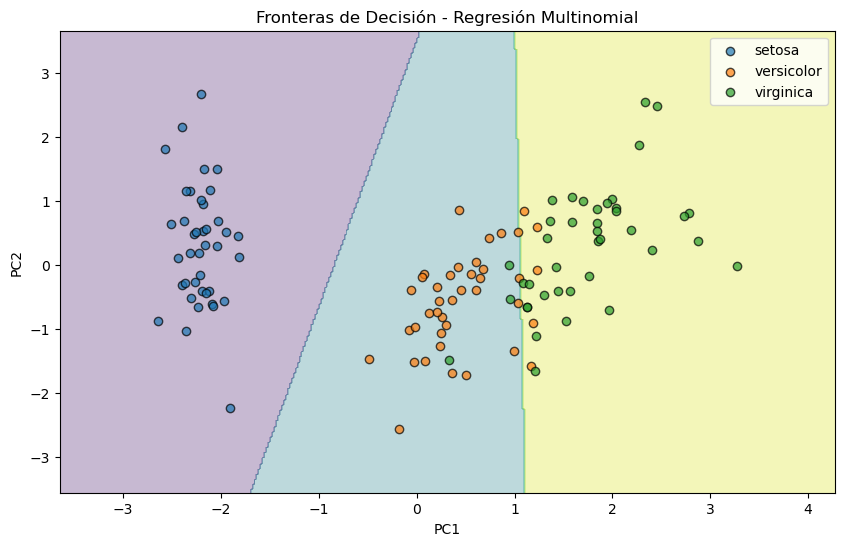

In [39]:
# -*- coding: utf-8 -*-
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

## 1. Carga y preparación de datos
iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

# Dividimos en train (80%) y test (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

## 2. Pipeline sin GridSearch (simple y directo)
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Estandarización
    ('pca', PCA(n_components=2, random_state=42)),  # Reducción a 2 componentes
    ('clf', LogisticRegression(  # Regresión Multinomial
        multi_class='multinomial',  # Especificamos multinomial explícitamente
        solver='lbfgs',  # Algoritmo adecuado para multinomial
        max_iter=1000,  # Número suficiente de iteraciones
        random_state=42
    ))
])

## 3. Entrenamiento
pipeline.fit(X_train, y_train)

## 4. Evaluación
print("=== Rendimiento en Test ===")
print("Accuracy:", pipeline.score(X_test, y_test))
print("\nReporte de Clasificación:")
print(classification_report(y_test, pipeline.predict(X_test), target_names=target_names))

# Matriz de confusión
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, pipeline.predict(X_test))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=target_names, yticklabels=target_names)
plt.title('Matriz de Confusión - Regresión Multinomial')
plt.ylabel('Verdaderos')
plt.xlabel('Predichos')
plt.show()

## 5. Visualización en espacio PCA
# Extraemos los componentes del pipeline
pca = pipeline.named_steps['pca']
X_train_pca = pca.transform(pipeline.named_steps['scaler'].transform(X_train))

plt.figure(figsize=(10, 6))
for i, name in enumerate(target_names):
    plt.scatter(X_train_pca[y_train == i, 0], X_train_pca[y_train == i, 1], 
                label=name, alpha=0.7)
plt.xlabel('Primer Componente Principal (PC1)')
plt.ylabel('Segundo Componente Principal (PC2)')
plt.title('Distribución de Clases en Espacio PCA')
plt.legend()
plt.grid()
plt.show()

## 6. Fronteras de decisión (opcional)
def plot_decision_boundaries():
    # Crear grid para visualización
    x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
    y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    
    # Predecir para cada punto del grid
    Z = pipeline.named_steps['clf'].predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Graficar
    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
    for i, name in enumerate(target_names):
        plt.scatter(X_train_pca[y_train == i, 0], X_train_pca[y_train == i, 1], 
                    label=name, alpha=0.7, edgecolor='k')
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.title('Fronteras de Decisión - Regresión Multinomial')
    plt.legend()
    plt.show()

plot_decision_boundaries()

# Clustering

# ¿Por qué NO usar train/test split en K-Means (clustering no supervisado)?

## 🚫 Razones fundamentales

### 1. **Naturaleza no supervisada**
   - **Sin etiquetas**: No hay "respuestas correctas" para evaluar generalización
   - **Objetivo distinto**: Buscamos descubrir patrones globales, no predecir

### 2. **Problemas de consistencia**
   ```python
   # Peligro: Clusters diferentes en train vs test
   kmeans_train = KMeans(n_clusters=3).fit(X_train)
   clusters_test = kmeans_train.predict(X_test)  # Centros no representativos

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.decomposition import PCA


In [41]:
# Configuración de visualización
plt.style.use('seaborn-v0_8')
sns.set_theme(style="whitegrid", palette="viridis")

Generación de datos:


In [53]:
# 1. Generación de datos (sin división train/test)
X, y = make_blobs(n_samples=1000, centers=4, cluster_std=1.2, 
                 random_state=42, n_features=5)
feature_names = [f'Feature_{i}' for i in range(X.shape[1])]

In [54]:
# 2. Estandarización de TODOS los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Aplicado a dataset completo

In [55]:
# 3. Método del codo para k óptimo (en datos completos)
inertias = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)  # Entrenamiento con todos los datos
    inertias.append(kmeans.inertia_)

C:\Users\joszea\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\joszea\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\joszea\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\joszea\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: 

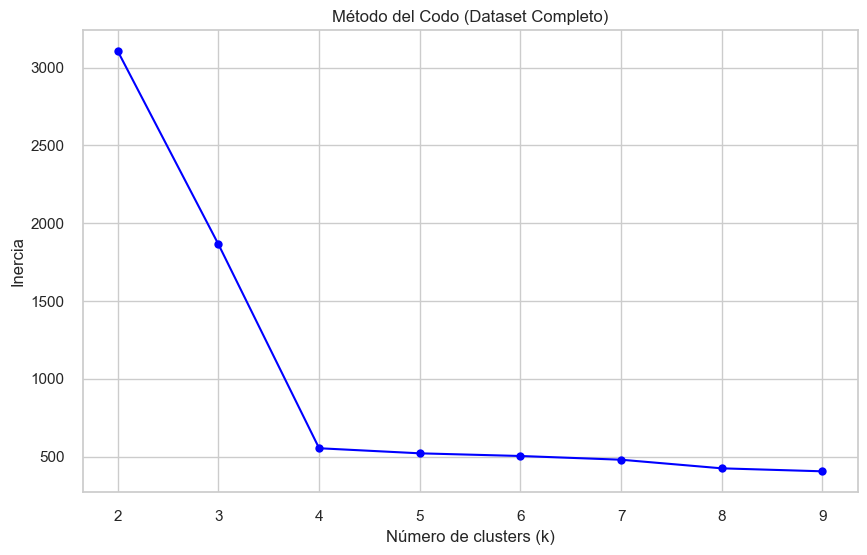

In [56]:
# Gráfico del codo
plt.figure(figsize=(10, 6))
plt.plot(range(2, 10), inertias, 'bo-')
plt.title('Método del Codo (Dataset Completo)')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inercia')
plt.grid(True)
plt.show()


In [57]:
# 4. Entrenamiento final con k óptimo (en datos completos)
optimal_k = 4  # Definido por el método del codo
kmeans = KMeans(n_clusters=optimal_k, random_state=42, init='k-means++', n_init=10)
kmeans.fit(X_scaled)
clusters = kmeans.predict(X_scaled)  # Clusters para todos los datos

C:\Users\joszea\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


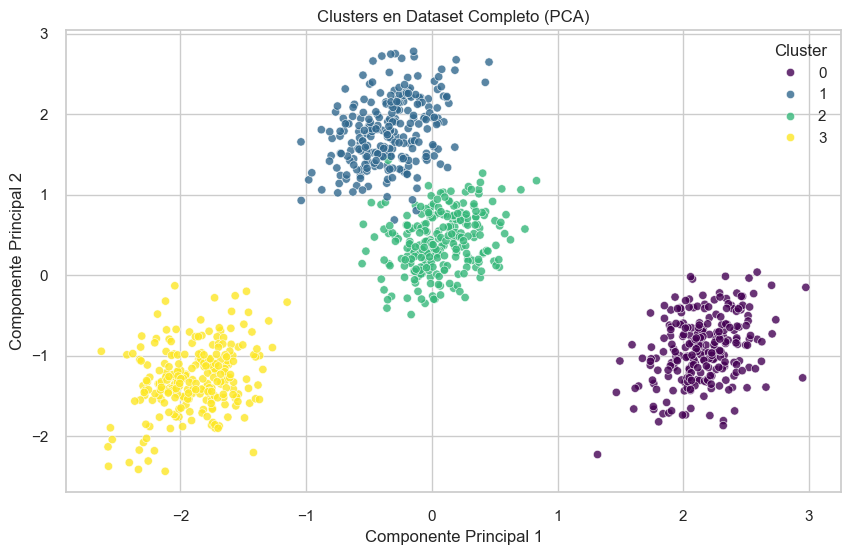

In [58]:
# 5. Visualización con PCA (dataset completo)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, 
                palette='viridis', alpha=0.8)
plt.title('Clusters en Dataset Completo (PCA)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title='Cluster')
plt.show()

In [61]:
# 6. Evaluación global
print("\nMétricas en dataset completo:")
print(f"Silhouette Score: {silhouette_score(X_scaled, clusters):.2f}")
print(f"Calinski-Harabasz: {calinski_harabasz_score(X_scaled, clusters):.2f}")

# 7. Análisis de clusters vs etiquetas reales (si existen)
if 'y' in locals():
    contingency_table = pd.crosstab(index=y, columns=clusters,
                                  rownames=['True Cluster'],
                                  colnames=['Cluster Asignado'])
    print("\nTabla de contingencia (Clusters vs Etiquetas Reales):")
    print(contingency_table)


Métricas en dataset completo:
Silhouette Score: 0.68
Calinski-Harabasz: 2668.92

Tabla de contingencia (Clusters vs Etiquetas Reales):
Cluster Asignado    0    1    2    3
True Cluster                        
0                   0  250    0    0
1                 250    0    0    0
2                   0    0    0  250
3                   0    0  250    0


# Ejemplo clustering

In [62]:
# -*- coding: utf-8 -*-
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.decomposition import PCA

In [ ]:


# Cargar datos
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

# Estandarización
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# Estandarización

In [46]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Cálculo de inercia

C:\Users\joszea\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\joszea\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\joszea\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\joszea\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: 

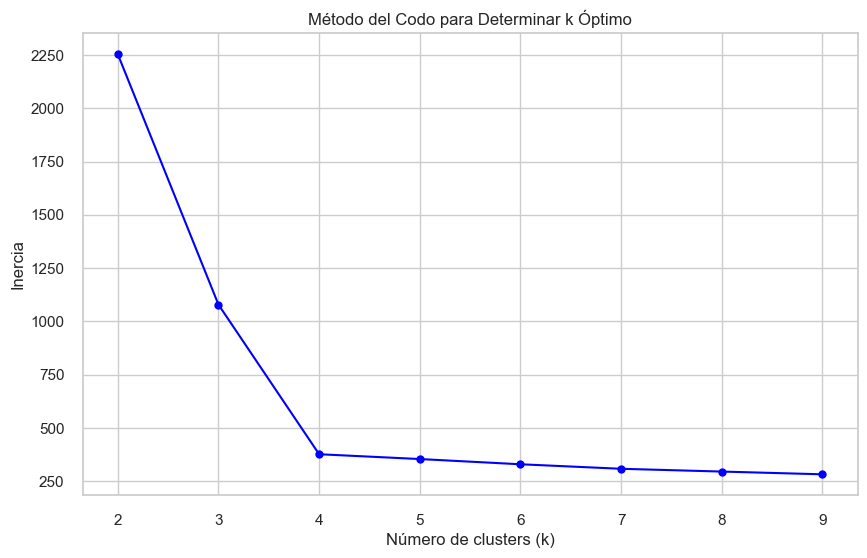

In [47]:

# Determinación del número óptimo de clusters (Método del codo)
inertias = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train_scaled)
    inertias.append(kmeans.inertia_)

# Gráfico del método del codo
plt.figure(figsize=(10, 6))
plt.plot(range(2, 10), inertias, 'bo-')
plt.title('Método del Codo para Determinar k Óptimo')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inercia')
plt.grid(True)
plt.show()


# Silhoutte

C:\Users\joszea\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\joszea\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\joszea\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\joszea\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: 

Para k=2, el score de Silhouette es: 0.406
Para k=3, el score de Silhouette es: 0.567
Para k=4, el score de Silhouette es: 0.686
Para k=5, el score de Silhouette es: 0.562
Para k=6, el score de Silhouette es: 0.445
Para k=7, el score de Silhouette es: 0.320
Para k=8, el score de Silhouette es: 0.320
Para k=9, el score de Silhouette es: 0.317


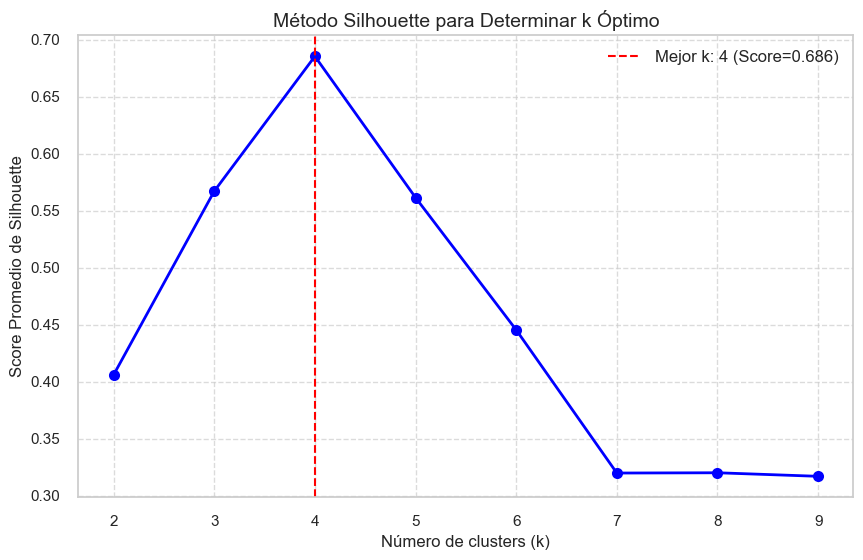

In [48]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# 1. Cálculo de los scores de Silhouette para diferentes valores de k
silhouette_scores = []
k_range = range(2, 10)  # Probamos de 2 a 9 clusters

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(X_train_scaled)
    
    # Calculamos el score promedio de Silhouette
    silhouette_avg = silhouette_score(X_train_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"Para k={k}, el score de Silhouette es: {silhouette_avg:.3f}")

# 2. Gráfico del Método Silhouette
plt.figure(figsize=(10, 6))
plt.plot(k_range, silhouette_scores, 'bo-', markersize=8, linewidth=2)
plt.title('Método Silhouette para Determinar k Óptimo', fontsize=14)
plt.xlabel('Número de clusters (k)', fontsize=12)
plt.ylabel('Score Promedio de Silhouette', fontsize=12)
plt.xticks(k_range)
plt.grid(True, linestyle='--', alpha=0.7)

# Destacamos el mejor k
best_k = k_range[np.argmax(silhouette_scores)]
plt.axvline(x=best_k, color='r', linestyle='--', 
            label=f'Mejor k: {best_k} (Score={max(silhouette_scores):.3f})')
plt.legend(fontsize=12)

plt.show()

# Entrenamiento con k=4


In [49]:
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42, init='k-means++', n_init=10)
kmeans.fit(X_train_scaled)
train_clusters = kmeans.predict(X_train_scaled)


C:\Users\joszea\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


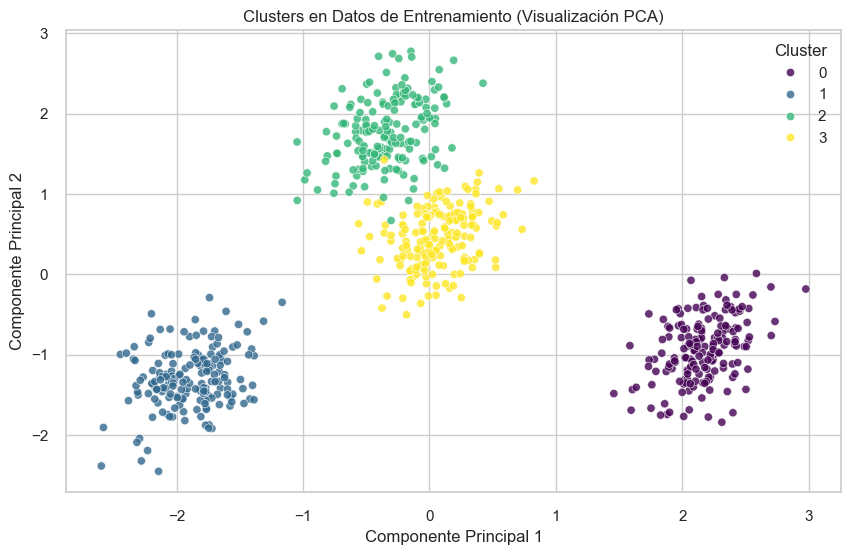

In [50]:

# Visualización con PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_train_pca[:, 0], y=X_train_pca[:, 1], hue=train_clusters, palette='viridis', alpha=0.8)
plt.title('Clusters en Datos de Entrenamiento (Visualización PCA)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title='Cluster')
plt.show()



In [51]:
# Evaluación
print("Métricas en entrenamiento:")
print(f"Silhouette Score: {silhouette_score(X_train_scaled, train_clusters):.2f}")
print(f"Calinski-Harabasz: {calinski_harabasz_score(X_train_scaled, train_clusters):.2f}")

Métricas en entrenamiento:
Silhouette Score: 0.69
Calinski-Harabasz: 1926.69


# Ejemplo 

In [63]:
# -*- coding: utf-8 -*-
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.decomposition import PCA


In [64]:
# Cargar datos
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names


In [65]:
# Estandarización
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [66]:

# Determinar k óptimo con Silhouette
silhouette_scores = []
k_range = range(2, 8)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    clusters = kmeans.fit_predict(X_scaled)
    silhouette_scores.append(silhouette_score(X_scaled, clusters))


C:\Users\joszea\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\joszea\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\joszea\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\joszea\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: 

C:\Users\joszea\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\joszea\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\joszea\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\joszea\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: 

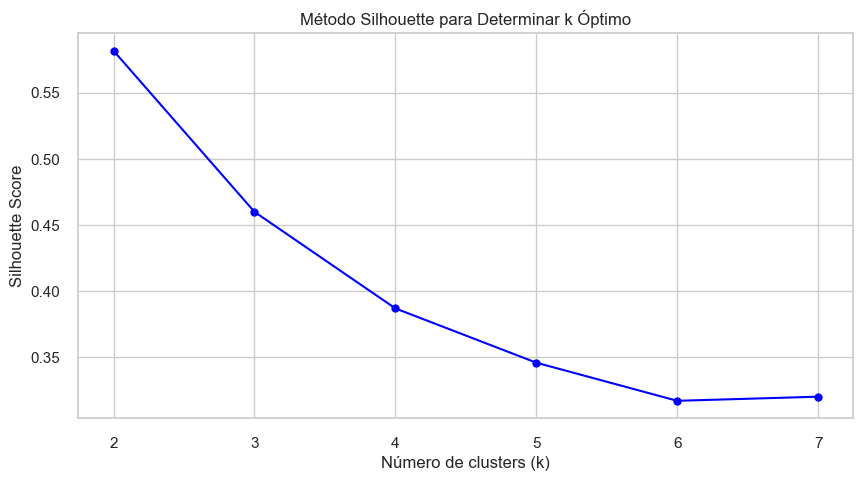

C:\Users\joszea\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(



📊 Métricas de Evaluación:
Silhouette: 0.460
Calinski-Harabasz: 241.904
Davies-Bouldin: 0.834


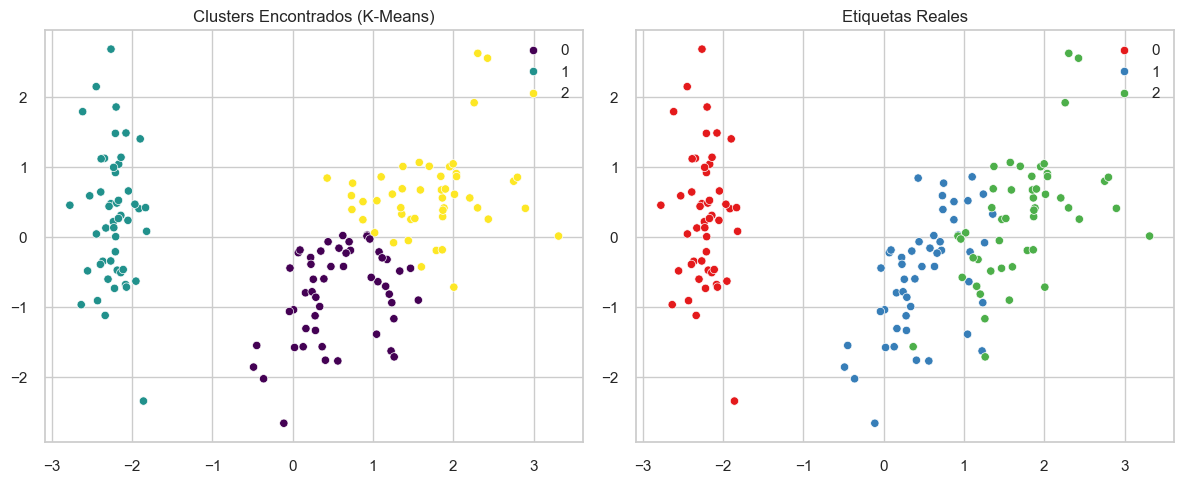


📌 Correspondencia Clusters vs Especies:
    0   1   2
             
0   0  50   0
1  39   0  11
2  14   0  36


In [67]:

# Determinar k óptimo con Silhouette
silhouette_scores = []
k_range = range(2, 8)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    clusters = kmeans.fit_predict(X_scaled)
    silhouette_scores.append(silhouette_score(X_scaled, clusters))

# Gráfico de Silhouette
plt.figure(figsize=(10, 5))
plt.plot(k_range, silhouette_scores, 'bo-')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Método Silhouette para Determinar k Óptimo')
plt.xticks(k_range)
plt.grid(True)
plt.show()

# Entrenar con mejor k (usualmente k=3 para Iris)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)


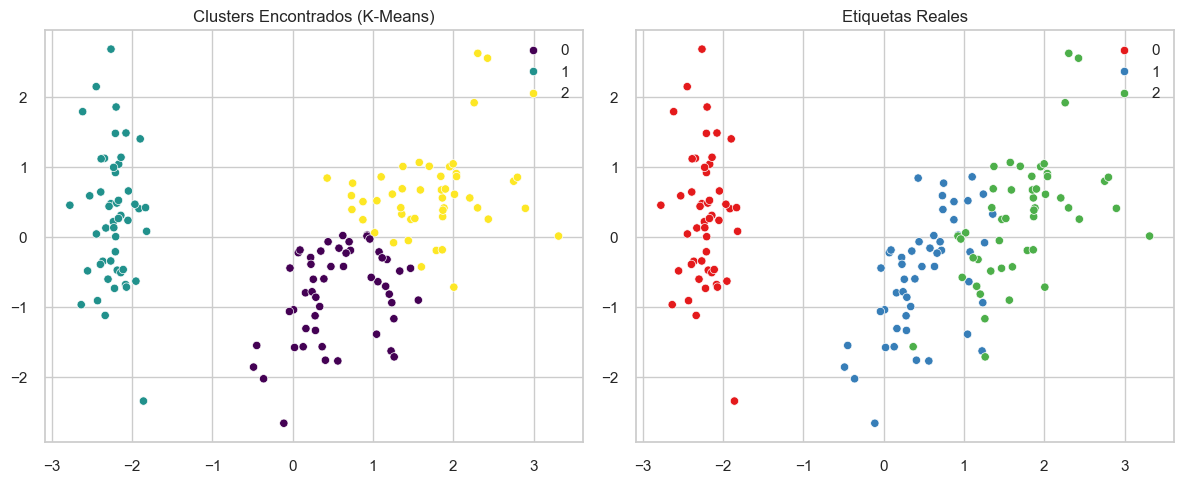

In [68]:

# Visualización con PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette='viridis')
plt.title('Clusters Encontrados (K-Means)')

plt.subplot(1, 2, 2)
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='Set1')
plt.title('Etiquetas Reales')

plt.tight_layout()
plt.show()


In [69]:

# Métricas de evaluación
metrics = {
    "Silhouette": silhouette_score(X_scaled, clusters),
    "Calinski-Harabasz": calinski_harabasz_score(X_scaled, clusters),
    "Davies-Bouldin": davies_bouldin_score(X_scaled, clusters)
}

print("\n📊 Métricas de Evaluación:")
for name, value in metrics.items():
    print(f"{name}: {value:.3f}")

# Análisis de correspondencia con etiquetas reales
contingency_table = pd.crosstab(
    index=pd.Series(y, name='Especie Real'), 
    columns=pd.Series(clusters, name='Cluster'),
    rownames=[''], 
    colnames=['']
)
print("\n📌 Correspondencia Clusters vs Especies:")
print(contingency_table)


📊 Métricas de Evaluación:
Silhouette: 0.460
Calinski-Harabasz: 241.904
Davies-Bouldin: 0.834

📌 Correspondencia Clusters vs Especies:
    0   1   2
             
0   0  50   0
1  39   0  11
2  14   0  36


# DBSCAN

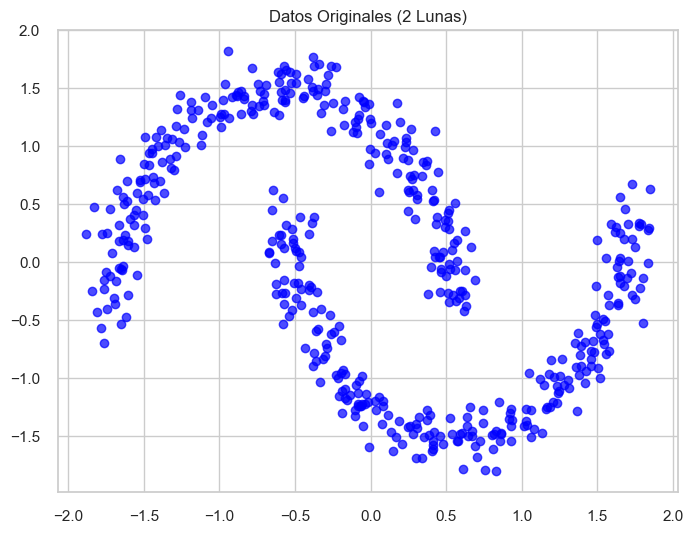

In [73]:
# -*- coding: utf-8 -*-
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# 1. Generación de datos (no lineales)
X, _ = make_moons(n_samples=500, noise=0.07, random_state=42)
X = StandardScaler().fit_transform(X)  # Estandarización

# 2. Visualización de datos originales
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c='blue', alpha=0.7)
plt.title('Datos Originales (2 Lunas)')
plt.grid(True)
plt.show()

In [74]:


# 3. Aplicación de K-Means (enfoque inadecuado)
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(X)

# 4. Aplicación de DBSCAN (enfoque correcto)
dbscan = DBSCAN(eps=0.3, min_samples=5)
dbscan_labels = dbscan.fit_predict(X)


C:\Users\joszea\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


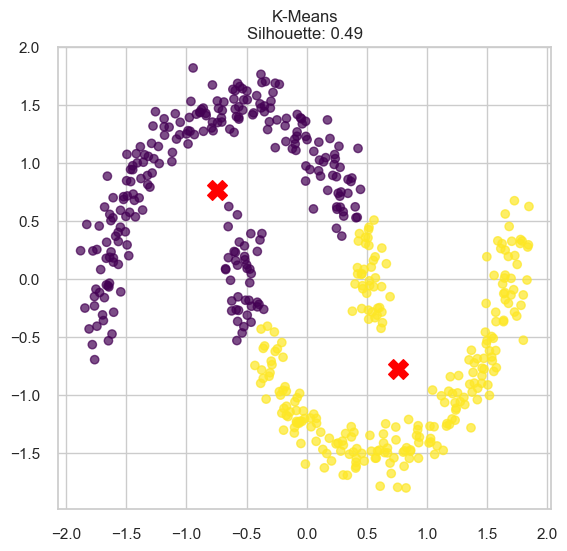

In [75]:

# 5. Visualización comparativa
plt.figure(figsize=(14, 6))

# K-Means
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=kmeans_labels, cmap='viridis', alpha=0.7)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            marker='X', s=200, c='red')
plt.title(f'K-Means\nSilhouette: {silhouette_score(X, kmeans_labels):.2f}')
plt.grid(True)


# DBSCAB

In [80]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.cluster import DBSCAN
from collections import Counter
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

In [81]:
# Read the CSV file
df_shapes = pd.read_csv("multishapes.csv")

# Select columns 'x' and 'y'
df_shapes = df_shapes[['x', 'y']]

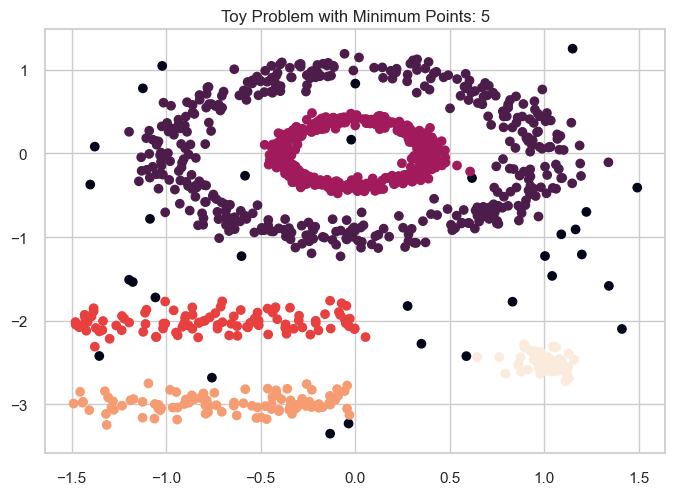

In [82]:
dbscan_method = DBSCAN(eps = 0.15, min_samples = 5, metric = 'euclidean')
plt.scatter(df_shapes.iloc[:,0], df_shapes.iloc[:,1], c = dbscan_method.fit_predict(df_shapes))
plt.title('Toy Problem with Minimum Points: ' + str(5))
plt.show()

EL -1 hace referencia al grupo de outliers:


In [83]:
labels = dbscan_method.fit_predict(df_shapes)
Counter(labels)

Counter({0: 410, 1: 405, 2: 104, 3: 99, 4: 51, -1: 31})

Ilustraremos el método para diferentes valores de epsilon:


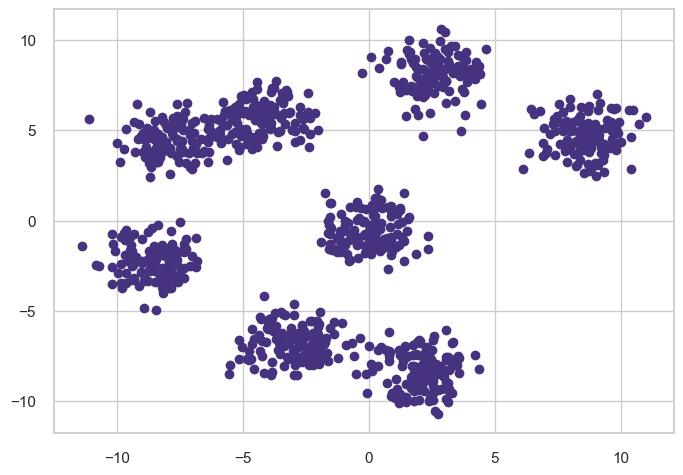

In [84]:
XX, yy = make_blobs(n_samples=1000, centers=8, n_features=2, random_state=800)
# Visualize the data
plt.scatter(XX[:,0], XX[:,1])
plt.show()

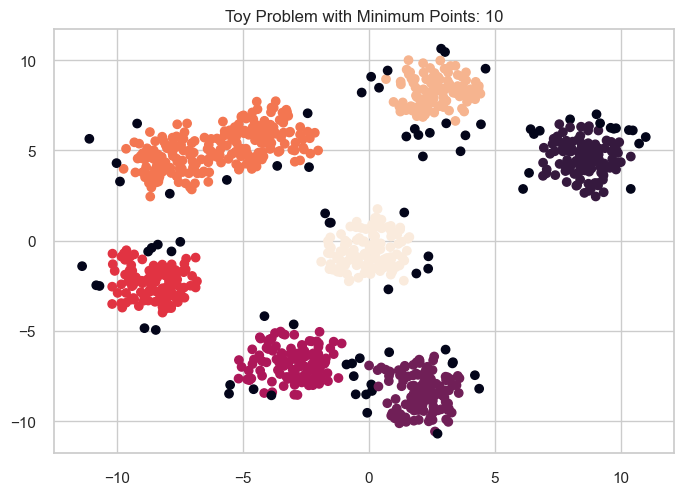

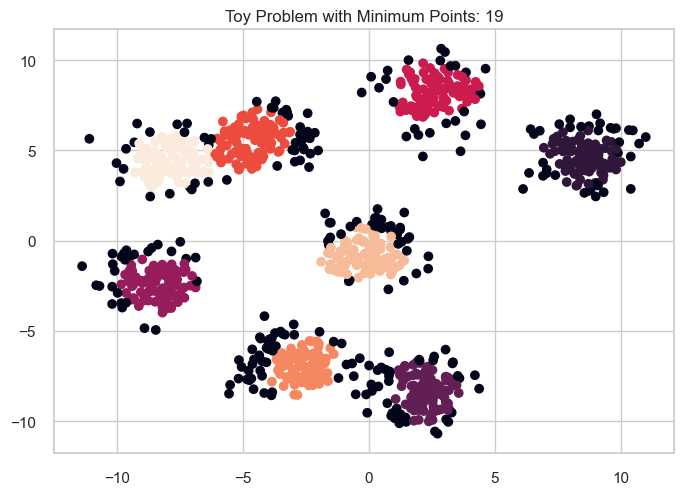

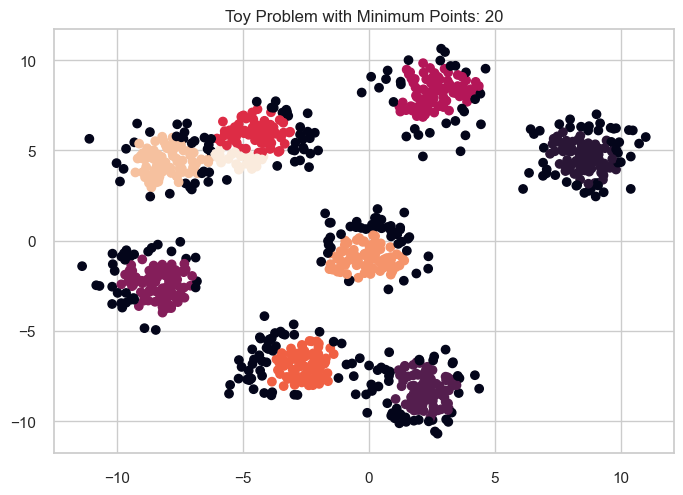

In [85]:
num_samples = [10,19,20]

for min_num in num_samples:
    db = DBSCAN(eps=0.7, min_samples=min_num, metric='euclidean')
    plt.scatter(XX[:,0], XX[:,1], c=db.fit_predict(XX))
    plt.title('Toy Problem with Minimum Points: ' + str(min_num))
    plt.show()

Observemos como varía el radio:


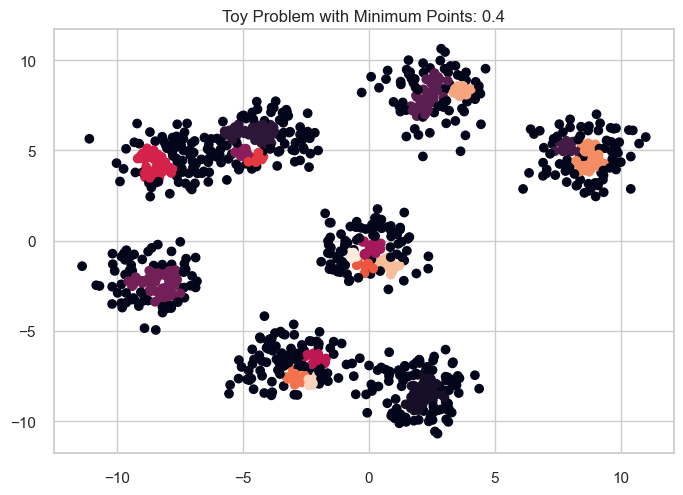

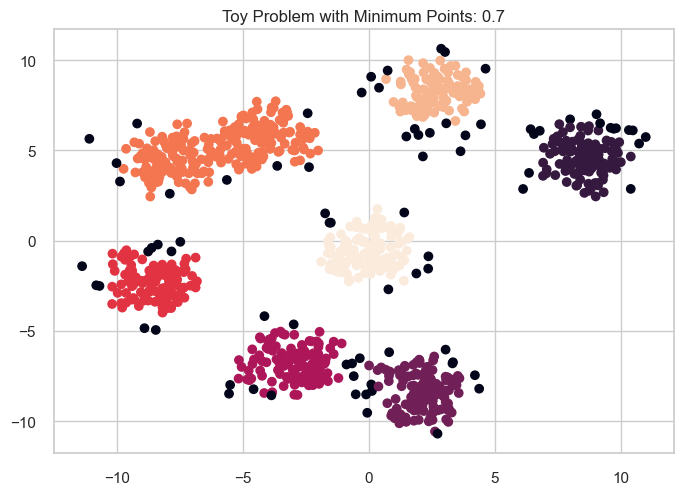

In [86]:
epsilons = [0.4,0.7]

for epsilon in epsilons:
    db = DBSCAN(eps=epsilon, min_samples=10, metric='euclidean')
    plt.scatter(XX[:,0], XX[:,1], c=db.fit_predict(XX))
    plt.title('Toy Problem with Minimum Points: ' + str(epsilon))
    plt.show()

Podemos también entrenar el modelo para cuando lleguen nuevos datos:


In [87]:
# Assuming your data has features 'x' and 'y', select those columns

# Split the data into training and testing sets
X_train, X_test = train_test_split(df_shapes, test_size=0.2, random_state=12345)

# Initialize DBSCAN model
dbscan = DBSCAN(eps=0.15, min_samples=5)

# Train the model
dbscan.fit(X_train)

# Predict cluster labels for the test data
test_labels = dbscan.fit_predict(X_test)
print(test_labels)

[ 5 -1 -1 -1 -1  0  1  1  1  5  2  3  1  1  3  1  6 -1 -1  1  4 -1  1  1 -1  2 -1 -1  1  2 -1 -1  5 -1 -1 -1  1  7  4  8 -1 -1
  1  1  1  3 -1 -1 -1 -1  8 -1  3  7 -1  1  1  3 -1 -1 -1 -1 -1  1  1 -1 -1 -1  1 -1  6 -1  1  3  1  1  1  1  2  1  1  6  2 -1
  1 -1 -1  4 -1  1  6  8 -1 -1 -1  8  1  1 -1  3 -1  1  0  1  1 -1  1 -1  0  5  1  1  1 -1 -1  1 -1  1 -1  1  3  7  3 -1  0 -1
 -1  1  1 -1  6  1 -1  1  1  0  2 -1  1 -1 -1  1 -1  3 -1 -1  1 -1  2  4  1  1  7  1  1 -1  1  5 -1 -1 -1 -1 -1  1  1 -1 -1 -1
  1  1  1  5 -1  1  1 -1  6 -1 -1  1  1  6  7 -1  5 -1 -1  1  1  3  1  8 -1  1 -1  1  1  1 -1  1  1 -1 -1  3  1  4 -1  5  2 -1
  1  1 -1  1 -1  2  1 -1 -1  5]


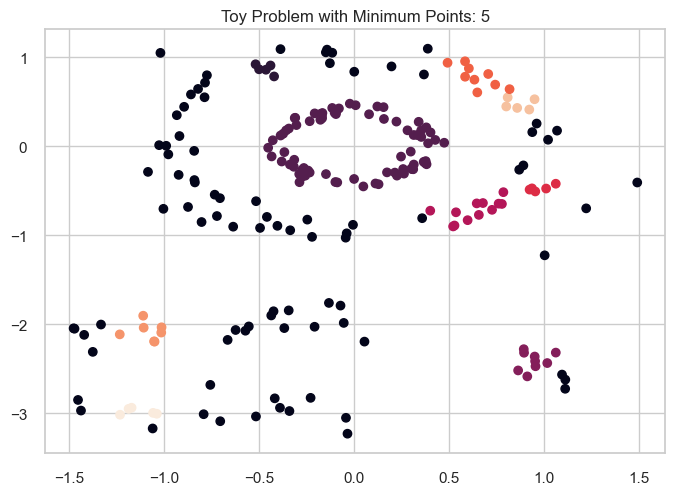

In [88]:
plt.scatter(X_test.iloc[:,0], X_test.iloc[:,1],
            c = dbscan_method.fit_predict(X_test))
plt.title('Toy Problem with Minimum Points: ' + str(5))
plt.show()